# 準備

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## load mnist

In [238]:
# load mnist
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

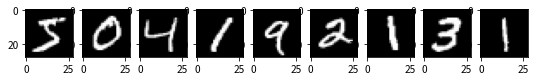

In [239]:
plt.figure(facecolor="white",figsize=(9,15))
for i in range(9):
    plt.subplot(1,9,i+1)
    plt.imshow(x_train[i],cmap="gray")

In [240]:
x_train = x_train.reshape(60000,28,28,1) # reshape array

## how to use ImageDataGenerator

In [241]:
from keras.preprocessing.image import ImageDataGenerator

In [249]:
def plot_result(gen):
    """生成したデータをプロットする関数"""
    plt.figure(facecolor="white",figsize=(10,10))
    for i in range(9):
        batches = next(gen)
        gen_img = batches[0][0,:,:].astype(np.uint8)
        plt.subplot(3, 3, i + 1)
        plt.title("class = "+str(batches[1][0]))
        plt.imshow(gen_img)
    plt.show()

In [250]:
# define augmentation contents
train_datagen = ImageDataGenerator(
    rotation_range=40, # 40°書回転させる
    data_format="channels_last" # channelを4次元に配置する
)

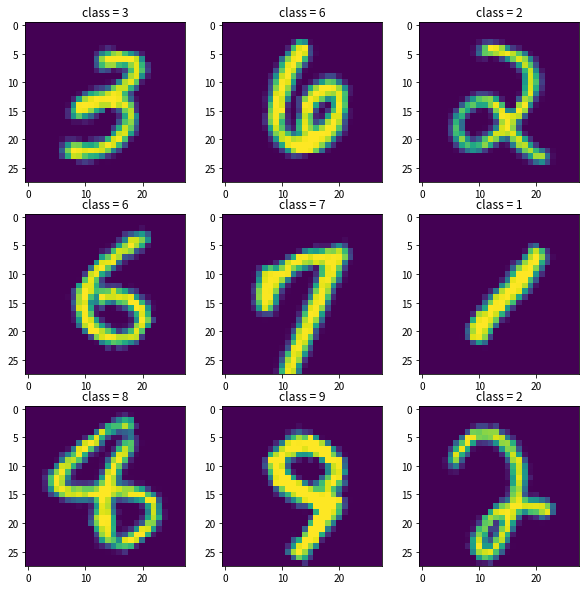

In [251]:
train_generator = train_datagen.flow(x=x_train,y=y_train,seed=1) # generate 
plot_result(train_generator)

# 画像データのAugmentation

Reference : 深層学習のための Image Data Augmentation（1：基本的な手法）https://qiita.com/syezo/items/d9bb6db9ba2f5163b3ae

## Flipping(反転)
Flippingは画像を反転させる処理を行う. 注意点として「6」,「9」のように反転させるとラベルが異なる場合は注意が必要である.

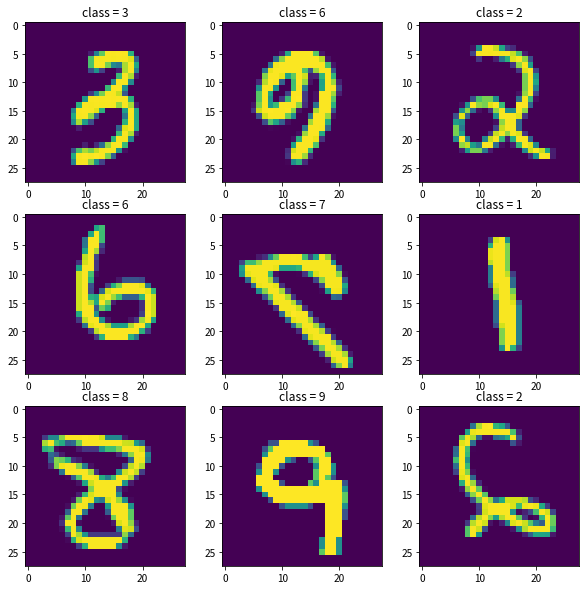

In [254]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True, # 水平方向(左右)に反転する
    vertical_flip=True, # 垂直方向(上下)に反転する
    data_format="channels_last" # channelを4次元に配置する
)

train_generator = train_datagen.flow(x_train,y_train,seed=1) # generate
plot_result(train_generator)

## Shift(移動)

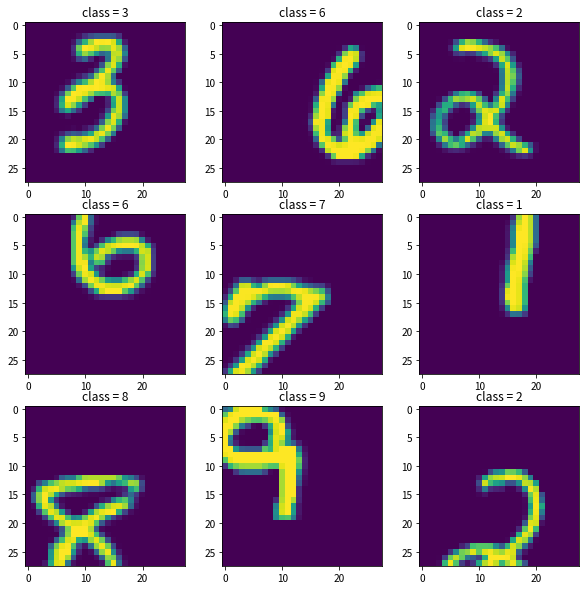

In [255]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.3, # 横方向に移動する割合
    height_shift_range=0.3, # 縦方向に移動する割合
    data_format="channels_last" # channelを4次元に配置する
)

train_generator = train_datagen.flow(x_train,y_train,seed=1) # generate
plot_result(train_generator)

## Rotation(回転)

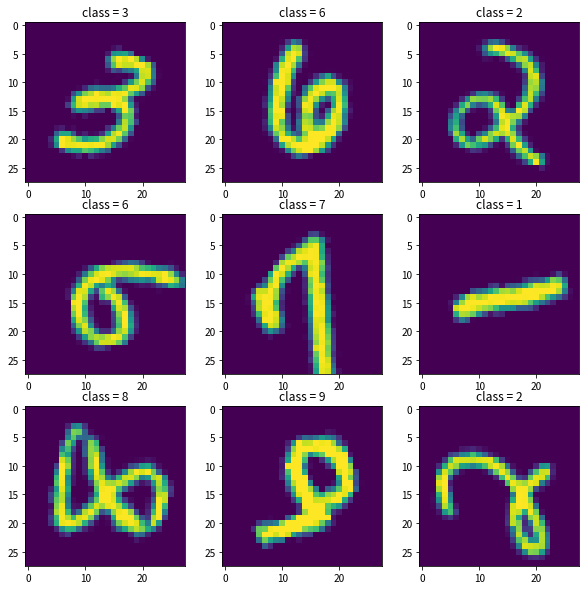

In [257]:
train_datagen = ImageDataGenerator(
    rotation_range=90,# 回転範囲(整数)
    data_format="channels_last" # channelを4次元に配置する
)

train_generator = train_datagen.flow(x_train,y_train,seed=1) # generate
plot_result(train_generator)

## Zoom(拡大縮小)

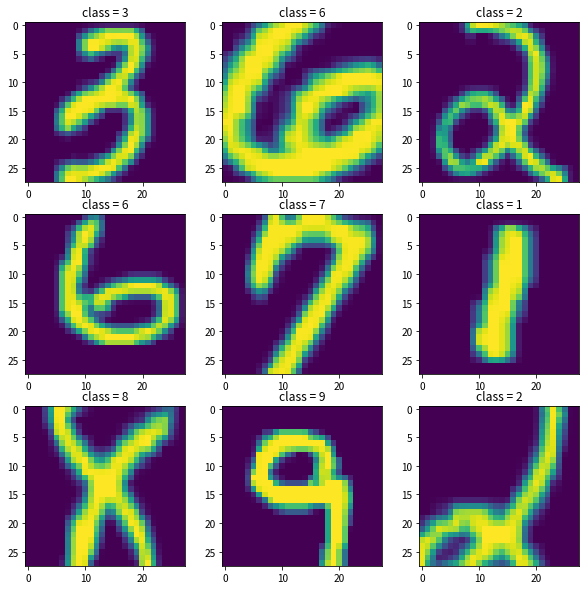

In [265]:
train_datagen = ImageDataGenerator(
    zoom_range=[0.4,0.9], # [縮小する割合, 拡大する割合]
    data_format="channels_last" # channelを4次元に配置する
)

train_generator = train_datagen.flow(x_train,y_train,seed=1) # generate
plot_result(train_generator)